#### EBOLA VIRUS  MODEL ON NETWORK IN THREE STAGES

In [1]:
'''A function to be use later to help the gif run the graph without mixing next graphs'''
def nmes(i,n):
    if i<=n+1:
        if (i<100) or (2<len(str(i))<5):
            t=int(str(i)[0:2])
            if 0<(i or t)<10:
                prf="a"
            elif 9<(i or t)<20:
                prf='b'
            elif 19<(i or t)<30:
                prf='c'
            elif 29<(i or t)<40:    
                prf='d'
            elif 39<(i or t)<50:    
                prf='e'
            elif 49<(i or t)<60:    
                prf='f'
            elif 59<(i or t)<70:    
                prf='g'
            elif 69<(i or t)<80:    
                prf='h'
            elif 79<(i or t)<90:    
                prf='k'
            elif 89<(i or t)<100:
                prf='l'      
            if len(str(i)) ==(3 or 4):
                prf='m'+ str(t)
    return prf

In [6]:
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEID Ebola Model on the Network
def seidmodel(G, theta, gamma, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEID EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimagerg/SEID EBOLA Model on a network=a'+str(z1)+str(i+1)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        infection_list2 = []
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting nodes from infected into death_list at rate gamma
        deathp=round(gamma*len(infectnode))
        new_death=np.random.choice(infectnode,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in infection_list:
                    infection_list2.append(node)
        # Putting remaining nodes from exposed which are not in infection_list into exposed_list
        for node in exposenode:
            if node not in infection_list:
                if node not in death_list:
                    if node not in infection_list2:
                        exposed_list.append(node)
        # New deathnode is initial deathnodes and death_list
        for node in death_list:
            if node not in deathnode:
                deathnode.append(node)
        # New infectnode is nodes in infection_list and infection_list2
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                infectnode.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,doutput])

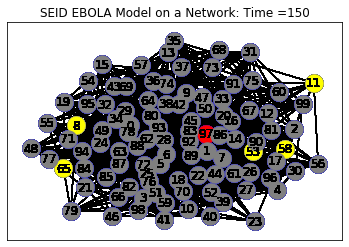

In [7]:
# Simulation for the Random Graph
import imageio 
import os
G = nx.erdos_renyi_graph(100,0.2)
time, n, theta, gamma = 150,100,0.1,0.5
infection_start_node = 0
RGV=seidmodel(G, theta, gamma, time, infection_start_node)
RGV
png_dir = '/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimagerg/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID_on_RG_network.movie"+str(n)+".movie.gif", images,duration=1.2)


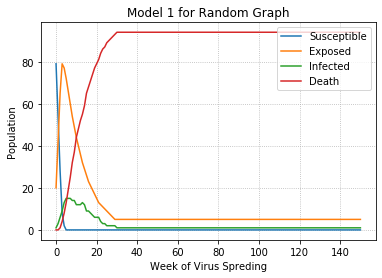

In [9]:
'''Random Graph - Visualizing EBOLA: Free-Spread Stage'''
import matplotlib.pyplot as plt
s,e,i,d = RGV[0,:], RGV[1,:], RGV[2,:], RGV[3,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 1 for Random Graph')
plt.xlabel('Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID EBOLA (Random Graph) - Data Parameter.png')
plt.show()

In [10]:
'''BARABASI ALBERT'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEID Ebola Model on the Network
def seidmodel(G, theta, gamma, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEID EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimageba/SEID EBOLA Model on a network=a'+str(z1)+str(i+1)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        infection_list2 = []
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting nodes from infected into death_list at rate gamma
        deathp=round(gamma*len(infectnode))
        new_death=np.random.choice(infectnode,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in infection_list:
                    infection_list2.append(node)
        # Putting remaining nodes from exposed which are not in infection_list into exposed_list
        for node in exposenode:
            if node not in infection_list:
                if node not in death_list:
                    if node not in infection_list2:
                        exposed_list.append(node)
        # New deathnode is initial deathnodes and death_list
        for node in death_list:
            if node not in deathnode:
                deathnode.append(node)
        # New infectnode is nodes in infection_list and infection_list2
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                infectnode.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,doutput])

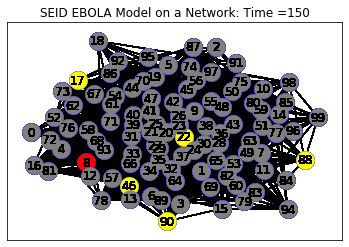

In [11]:
# Simulation for the Barabasi Albert
import imageio 
import os
G = nx.barabasi_albert_graph(100,20)
time, n, theta, gamma = 150,100,0.1,0.5
infection_start_node = 0
BAV=seidmodel(G, theta, gamma, time, infection_start_node)
BAV
png_dir = '/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimageba/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID_on_BA_network.movie"+str(n)+".movie.gif", images,duration=1.2)


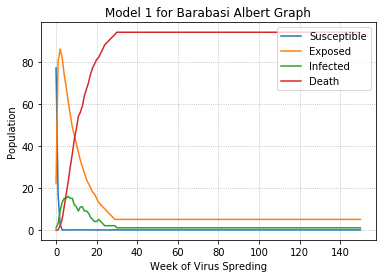

In [12]:
'''Barabasi Albert Graph - Visualizing EBOLA: Free-Spread Stage'''
import matplotlib.pyplot as plt
s,e,i,d = BAV[0,:], BAV[1,:], BAV[2,:], BAV[3,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 1 for Barabasi Albert Graph')
plt.xlabel('Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID EBOLA (Barabasi Albert) - Data Parameter.png')
plt.show()

In [2]:
'''WATTS STROGATZ'''
import matplotlib.pyplot as plt
import networkx as nx 
import random
import numpy as np
# Function for the SEID Ebola Model on the Network
def seidmodel(G, theta, gamma, time, infection_start_node):
    pos=nx.spring_layout(G)
    # Initializing nodes in the compartments
    infectnode = [infection_start_node]
    exposenode = []
    for node in G.neighbors(infection_start_node):
        exposenode.append(node)
    susceptn = []
    for node in G.nodes():
        if node not in infectnode:
            if node not in exposenode:
                susceptn.append(node)
    susceptnode=susceptn
    deathnode=[]
    soutput=[]
    eoutput=[]
    ioutput=[]
    doutput=[]
    i=0
    while i < time+1:
        # Keeping track of individuals in each compartment at time t
        soutput.append(len(susceptnode))
        eoutput.append(len(exposenode))
        ioutput.append(len(infectnode))
        doutput.append(len(deathnode))
        # Plotting and Saving the Graph of the Compartments
        plt.title("SEID EBOLA Model on a Network: Time =" + str(i))
        nx.draw_networkx(G, pos=pos, node_color="blue",font_color="black",edge_color="black")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=exposenode, node_color="yellow")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=infectnode, node_color="red")
        nx.draw_networkx_nodes(G, pos=pos, nodelist=deathnode, node_color="grey")
        z1=nmes(i+1,time)
        plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimagews/SEID EBOLA Model on a network=a'+str(z1)+str(i+1)+'.png')
        # Declaring Dummy Lists
        susceptible_list = []
        exposed_list = []
        infection_list = []
        death_list = []
        infection_list2 = []
        # Putting nodes from exposed into infection_list at rate theta
        infp=round(theta*len(exposenode))
        new_infect=np.random.choice(exposenode,infp)
        for node in new_infect:
            if node not in infection_list:
                infection_list.append(node)    
        # Putting nodes from infected into death_list at rate gamma
        deathp=round(gamma*len(infectnode))
        new_death=np.random.choice(infectnode,deathp)
        for node in new_death:
            if node not in death_list:
                death_list.append(node)    
        # Putting remaining nodes from infected which are not in death_list into infection_list2
        for node in infectnode:
            if node not in death_list:
                if node not in infection_list:
                    infection_list2.append(node)
        # Putting remaining nodes from exposed which are not in infection_list into exposed_list
        for node in exposenode:
            if node not in infection_list:
                if node not in death_list:
                    if node not in infection_list2:
                        exposed_list.append(node)
        # New deathnode is initial deathnodes and death_list
        for node in death_list:
            if node not in deathnode:
                deathnode.append(node)
        # New infectnode is nodes in infection_list and infection_list2
        infctnod=infection_list + infection_list2
        infectnode=[]
        for node in infctnod:
            if node not in deathnode:
                infectnode.append(node)
        # New exposenode is nodes in exposed_list and neighbours of infectnode
        exposenode= exposed_list
        for nod in infectnode:
            for node in G.neighbors(nod):
                if node not in exposenode:
                    if node not in deathnode:
                        if node not in infectnode:
                            exposenode.append(node)
        # New susceptnode are nodes not in other compartments
        for node in G.nodes():
            if node not in exposenode:
                if node not in infectnode:
                    if node not in deathnode:
                        susceptible_list.append(node)
        susceptnode = susceptible_list
        i+=1
    return np.array([soutput,eoutput,ioutput,doutput])

C:\Users\LIGHT\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


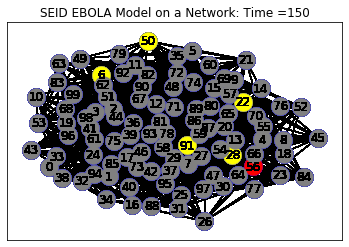

In [3]:
# Simulation for the Watts Strogatz Graph
import imageio 
import os
G = nx.watts_strogatz_graph(100, 20, 0.7)
time, n, theta, gamma = 150,100,0.1,0.5
infection_start_node = 0
WSV=seidmodel(G, theta, gamma, time, infection_start_node)
WSV
png_dir = '/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/seidimagews/'
images = []
for file_name in os.listdir(png_dir):
    if file_name.endswith('.png'):      
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave("/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID_on_WS_network.movie"+str(n)+".movie.gif", images,duration=1.2)

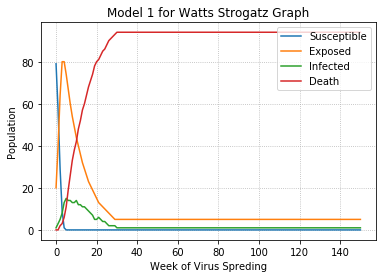

In [4]:
'''Watts Strogatz Graph - Visualizing EBOLA: Free-Spread Stage'''
import matplotlib.pyplot as plt
s,e,i,d = WSV[0,:], WSV[1,:], WSV[2,:], WSV[3,:]
time=np.arange(0,151,1)
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Model 1 for Watts Strogatz Graph')
plt.xlabel('Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID EBOLA (Watts Strogatz) - Data Parameter.png')
plt.show()

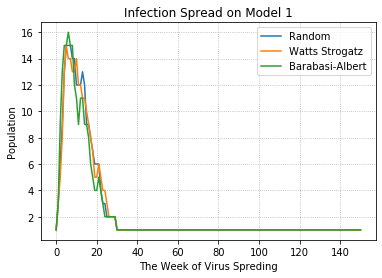

In [13]:
'''Visualizing EBOLA Infection in from the Three Graphs'''
import matplotlib.pyplot as plt
i1,i2,i3 = RGV[2,:], WSV[2,:], BAV[2,:]
plt.plot(time, i1, label='Random')
plt.plot(time, i2, label='Watts Strogatz')
plt.plot(time, i3, label='Barabasi-Albert')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.title('Infection Spread on Model 1')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/ALL INFECTION IN EBOLA MODEL on Network - Data Parameter.png')
plt.show()